In [2]:
import sys, sh
sys.path.append('../')
from fns import *

In [3]:
rootPath = "/Users/guillaume/Projects/github/NeedleFinder/data/"
dataPath = rootPath + "LabelMaps_GUILLAUME_03122017/"
savePath = rootPath + "LabelMaps/"

trainingCases = loadCases("training.txt")
validationCases = loadCases("validation.txt")
testingCases = loadCases("testing.txt")
files = np.concatenate([[dataPath + name + '/case.nrrd' for name in trainingCases], 
                [dataPath + name + '/case.nrrd' for name in validationCases], 
                [dataPath + name + '/case.nrrd' for name in testingCases]])
files_labels = np.concatenate([[dataPath + name + '/needles.nrrd' for name in trainingCases], 
                [dataPath + name + '/needles.nrrd' for name in validationCases], 
                [dataPath + name + '/needles.nrrd' for name in testingCases]])

In [56]:
%matplotlib inline
file = files[10]
data, options = nrrd.read(file)
data = data.astype(np.float32)


clahe_filter = True
if clahe_filter:
    nx,ny,nz = data.shape
    clahe = cv2.createCLAHE(clipLimit=0, tileGridSize=(5, 5))
    data_res = []
    for k in range(nz):
        cl = data[...,k].copy()
        cl = cl.astype('uint16')
        data_res.append(clahe.apply(cl))
    data_res = np.array(data_res)
    data_res = np.swapaxes(data_res, 0, 1)
    data_res = np.swapaxes(data_res, 1, 2)
    data_ = data_res
    
#     clahe = cv2.createCLAHE(clipLimit=0, tileGridSize=(10, 10))
#     data_res = []
#     for k in range(nx):
#         cl = data[k,...].copy()
#         cl = cl.astype('uint16')
#         data_res.append(clahe.apply(cl))
#     data_res = np.array(data_res)
#     data_ += data_res

(220, 220, 204)


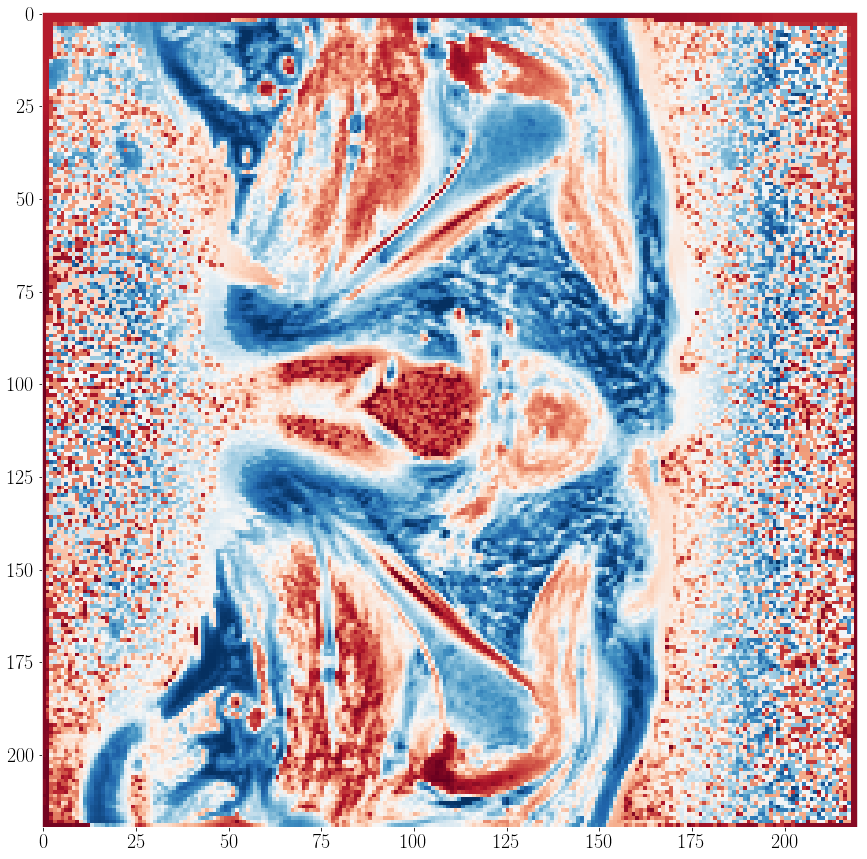

In [57]:

f(15,15)
print(data_.shape)
plt.imshow(data_[...,50], cmap=plt.cm.RdBu)

In [5]:
for j in trange(len(files)):
    file = files[j]
    data, options = nrrd.read(file)
    data = data.astype(np.float32)
    
    clahe_filter = False
    if clahe_filter:
        nx,ny,nz = data.shape
        clahe = cv2.createCLAHE(clipLimit=0, tileGridSize=(30, 30))
        data_res = []
        for k in range(nz):
            cl = data[..., k].copy()
            cl = cl.astype('uint16')
            data_res.append(clahe.apply(cl))
        data_res = np.swapaxes(data_res, 0, 1)
        data_res = np.swapaxes(data_res, 1, 2)
        data = data_res
    
    
    arr_data = cutVolume(data, tile=144)
    file= file.replace(dataPath,savePath)
    
    dirPath = os.path.dirname(file)
    if not os.path.exists(dirPath):
        os.makedirs(dirPath)
    if not os.path.exists(file):
        nrrd.write(file, data)
    for i in trange(len(arr_data)):
        img = arr_data[i]
        name = file.replace('.nrrd', '')
        name += '_%d.npy'%i
        np.save(name, img)

  0%|          | 0/47 [00:00<?, ?it/s]

Original input shape (320, 256, 40)
Padded input shape: (408, 344, 128)
# of parts 7 7 3
number of tiles: 84 
data shape (84, 148, 148, 20)



  2%|▏         | 1/47 [00:17<13:38, 17.78s/it]s]

Original input shape (320, 320, 26)
Padded input shape: (408, 408, 114)
# of parts 7 7 2
number of tiles: 98 
data shape (98, 148, 148, 34)



  4%|▍         | 2/47 [00:33<12:39, 16.88s/it]s]

Original input shape (320, 320, 30)
Padded input shape: (408, 408, 118)
# of parts 7 7 2
number of tiles: 98 
data shape (98, 148, 148, 30)



  6%|▋         | 3/47 [00:54<13:18, 18.15s/it]s]

Original input shape (320, 256, 22)
Padded input shape: (408, 344, 110)
# of parts 7 7 2
number of tiles: 84 
data shape (84, 148, 148, 38)



  9%|▊         | 4/47 [01:05<11:47, 16.45s/it]]

Original input shape (320, 256, 28)
Padded input shape: (408, 344, 116)
# of parts 7 7 2
number of tiles: 84 
data shape (84, 148, 148, 32)



 11%|█         | 5/47 [01:21<11:22, 16.25s/it]s]

Original input shape (320, 320, 40)
Padded input shape: (408, 408, 128)
# of parts 7 7 3
number of tiles: 98 
data shape (98, 148, 148, 20)



 13%|█▎        | 6/47 [01:41<11:36, 17.00s/it]s]

Original input shape (320, 320, 26)
Padded input shape: (408, 408, 114)
# of parts 7 7 2
number of tiles: 98 
data shape (98, 148, 148, 34)



 15%|█▍        | 7/47 [01:58<11:17, 16.93s/it]s]

Original input shape (640, 416, 96)
Padded input shape: (728, 504, 184)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 17%|█▋        | 8/47 [05:14<25:32, 39.30s/it]/s]

Original input shape (640, 416, 144)
Padded input shape: (728, 504, 232)
# of parts 13 13 4
number of tiles: 384 
data shape (384, 148, 148, 148)



 87%|████████▋ | 335/384 [00:21<00:03, 15.78it/s]


 19%|█▉        | 9/47 [10:15<43:18, 68.38s/it]/s]

Original input shape (320, 320, 36)
Padded input shape: (408, 408, 124)
# of parts 7 7 3
number of tiles: 98 
data shape (98, 148, 148, 24)



 21%|██▏       | 10/47 [10:33<39:05, 63.39s/it]]

Original input shape (320, 320, 34)
Padded input shape: (408, 408, 122)
# of parts 7 7 3
number of tiles: 98 
data shape (98, 148, 148, 26)



 23%|██▎       | 11/47 [11:00<36:00, 60.02s/it]]

Original input shape (640, 416, 112)
Padded input shape: (728, 504, 200)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 26%|██▌       | 12/47 [14:32<42:25, 72.73s/it]

Original input shape (640, 416, 160)
Padded input shape: (728, 504, 248)
# of parts 13 13 5
number of tiles: 384 
data shape (384, 148, 148, 148)



 86%|████████▌ | 329/384 [00:20<00:03, 16.00it/s]


 28%|██▊       | 13/47 [19:44<51:38, 91.13s/it]

Original input shape (640, 416, 120)
Padded input shape: (728, 504, 208)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 30%|██▉       | 14/47 [23:44<55:56, 101.72s/it]]

Original input shape (320, 256, 22)
Padded input shape: (408, 344, 110)
# of parts 7 7 2
number of tiles: 84 
data shape (84, 148, 148, 38)



 32%|███▏      | 15/47 [23:55<51:03, 95.72s/it] [A

Original input shape (640, 416, 120)
Padded input shape: (728, 504, 208)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 34%|███▍      | 16/47 [27:43<53:43, 103.98s/it]]

Original input shape (640, 416, 96)
Padded input shape: (728, 504, 184)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 36%|███▌      | 17/47 [30:55<54:34, 109.15s/it]

Original input shape (640, 416, 112)
Padded input shape: (728, 504, 200)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 38%|███▊      | 18/47 [34:37<55:46, 115.40s/it]]

Original input shape (320, 256, 30)
Padded input shape: (408, 344, 118)
# of parts 7 7 2
number of tiles: 84 
data shape (84, 148, 148, 30)



 40%|████      | 19/47 [34:53<51:25, 110.20s/it]

Original input shape (320, 256, 21)
Padded input shape: (408, 344, 109)
# of parts 7 7 2
number of tiles: 84 
data shape (84, 148, 148, 39)



 43%|████▎     | 20/47 [35:04<47:21, 105.24s/it][A

Original input shape (320, 320, 34)
Padded input shape: (408, 408, 122)
# of parts 7 7 3
number of tiles: 98 
data shape (98, 148, 148, 26)



 45%|████▍     | 21/47 [35:28<43:54, 101.34s/it]

Original input shape (640, 416, 112)
Padded input shape: (728, 504, 200)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 47%|████▋     | 22/47 [39:22<44:44, 107.40s/it]]

Original input shape (640, 416, 144)
Padded input shape: (728, 504, 232)
# of parts 13 13 4
number of tiles: 384 
data shape (384, 148, 148, 148)



 89%|████████▊ | 340/384 [00:19<00:02, 17.45it/s]


 49%|████▉     | 23/47 [43:56<45:50, 114.62s/it]]

Original input shape (640, 416, 128)
Padded input shape: (728, 504, 216)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)



 51%|█████     | 24/47 [47:58<45:58, 119.93s/it]]

Original input shape (640, 416, 112)
Padded input shape: (728, 504, 200)
# of parts 13 13 4
number of tiles: 288 
data shape (288, 148, 148, 148)


KeyboardInterrupt: 

In [ ]:
for file in files_labels:
    data, options = nrrd.read(file)
    data = data.astype(np.uint8)
    arr_data = cutVolume(data)
    file= file.replace(dataPath,savePath)
    if not os.path.exists(file):
        nrrd.write(file, data)
    dirPath = os.path.dirname(file)
    if not os.path.exists(dirPath):
        sh.mkdir(dirPath)
    for i in trange(len(arr_data)):
        img = arr_data[i]
        name = file.replace('.nrrd', '')
        name += '_%d.npy'%i
        np.save(name, img)